# Human Activity Recongition Models - UCI Repository

In [151]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sn

In [10]:
trainX = pd.read_table('C:/Users/gokul/Documents/Projects/human Activity/X_train.txt', delim_whitespace=True,header=None)
trainy = pd.read_table('C:/Users/gokul/Documents/Projects/human Activity/y_train.txt',delim_whitespace=True,header=None)
testX = pd.read_csv("C:/Users/gokul/Documents/Projects/human Activity/X_test.txt",delim_whitespace=True,header=None)
testy = pd.read_csv('C:/Users/gokul/Documents/Projects/human Activity/y_test.txt',delim_whitespace=True,header=None)

In [11]:
mu = trainX.mean(axis=0)
mu1 = testX.mean(axis=0)
stdv = trainX.std(axis = 0)
stdv1 = testX.std(axis = 0)

X_train = (trainX - mu)/stdv
X_test = (testX - mu1)/stdv1
y_train = trainy
y_test = testy
y = np.array(y_train).ravel()

dickey = {"1":"WALKING", "2":"WALKING_UPSTAIRS","3":"WALKING_DOWNSTAIRS","4":"SITTING","5":"STANDING","6":"LAYING"}

## Decision Tree

0.952937976061
0.834747200543


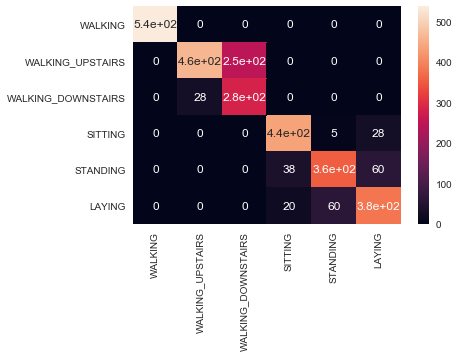

In [163]:
rank_classifier = DecisionTreeClassifier(max_leaf_nodes=30, random_state=0)
rank_classifier.fit(X_train,y_train)
#print(type(rank_classifier))
Predictions_test = rank_classifier.predict(X_test)
Predictions_train = rank_classifier.predict(X_train)
TrainAccuracy = accuracy_score(y_true = y_train, y_pred = Predictions_train)
TestAccuracy = accuracy_score(y_true = y_test, y_pred = Predictions_test)

print(TrainAccuracy)
print(TestAccuracy)

yy = list(map(str, Predictions_test))
y_test1 = np.array(y_test.T).ravel()
yy1 = list(map(str,y_test1))
pred1 = np.array(pd.Series(yy).map(dickey))
y_test1 = np.array(pd.Series(yy1).map(dickey))

array = confusion_matrix(pred1,y_test1)
df_cm = pd.DataFrame(array, range(6),range(6))
#sn.set(font_scale=1)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12},yticklabels=("WALKING", "WALKING_UPSTAIRS","WALKING_DOWNSTAIRS","SITTING","STANDING","LAYING"), xticklabels=("WALKING", "WALKING_UPSTAIRS","WALKING_DOWNSTAIRS","SITTING","STANDING","LAYING"))# font size
plt.show()

## K Neearest Neighbors

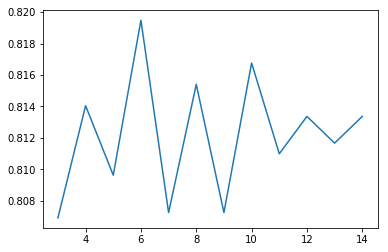

Optimal K value is 6
Accuracy of Optimum K value is 0.8194774346793349


In [50]:
from sklearn import neighbors
Accuracy_KNN = np.array([])
rangeli = np.array(list(range(3,15)))
for i in rangeli:
    knn = neighbors.KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predicted_knn = knn.predict(X_test)
    Accuracy = accuracy_score(y_true = y_test, y_pred = predicted_knn)
    Accuracy_KNN = np.append(Accuracy_KNN, Accuracy)

plt.plot(rangeli, Accuracy_KNN)
plt.show()
print("Optimal K value is {}".format(rangeli[np.argmax(Accuracy_KNN)]))
print("Accuracy of Optimum K value is {}".format(np.max(Accuracy_KNN)))

## Gaussian Naive Bayes

Training Accuracy of Gaussian Naive Bayes:  0.7461915125136017
Testing Accuracy of Gaussian Naive Bayes: 0.5721072276891754


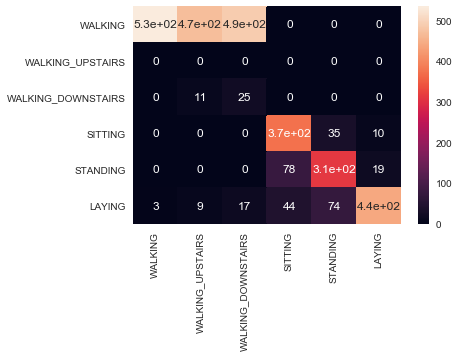

In [161]:
from sklearn.naive_bayes import GaussianNB

mnb = GaussianNB()
mnb.fit(X_train, y)
predicted_mnb = mnb.predict(X_test)
predicted_train = mnb.predict(X_train)
#Accuracy = accuracy_score(y_true = y_test, y_pred = y_pred)
Accuracy_test = accuracy_score(y_true = y_test, y_pred = predicted_mnb)
Accuracyl_train = accuracy_score(y_true = y_train, y_pred = predicted_train)
print("Training Accuracy of Gaussian Naive Bayes:  {}".format(Accuracyl_train))
print("Testing Accuracy of Gaussian Naive Bayes: {}".format(Accuracy_test))

yy = list(map(str, predicted_mnb))
y_test1 = np.array(y_test.T).ravel()
yy1 = list(map(str,y_test1))
pred1 = np.array(pd.Series(yy).map(dickey))
y_test1 = np.array(pd.Series(yy1).map(dickey))

array = confusion_matrix(pred1,y_test1)
df_cm = pd.DataFrame(array, range(6),range(6))
#sn.set(font_scale=1)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12},yticklabels=("WALKING", "WALKING_UPSTAIRS","WALKING_DOWNSTAIRS","SITTING","STANDING","LAYING"), xticklabels=("WALKING", "WALKING_UPSTAIRS","WALKING_DOWNSTAIRS","SITTING","STANDING","LAYING"))# font size
plt.show()

## Logistic Regression

In [84]:
cli = [3,1,0.5,0.1,0.01]
trainacc = np.array([])
testacc = np.array([])
for j in cli:
    LRmod = linear_model.LogisticRegression(penalty='l1', C=j)
    LRmod.fit(X_train,y)
    pred = LRmod.predict(X_test)
    pred1 = LRmod.predict(X_train)
    testac = accuracy_score(y_true = y_test, y_pred = pred)
    trainac = accuracy_score(y_true = y_train, y_pred = pred1)
    trainacc = np.append(trainacc,trainac)
    testacc = np.append(testacc,testac)

val = np.subtract(trainacc,testacc)    
print("Optimum Penalty value: {}".format(cli[np.argmin(val)]))
print("Maximum Testing Accuracy: {}".format(testacc[np.argmin(val)]))
print("Maximum Training Accuracy: {}".format(trainacc[np.argmin(val)]))

Optimum Penalty value: 0.01
Maximum Testing Accuracy: 0.9321343739395996
Maximum Training Accuracy: 0.9460010881392819


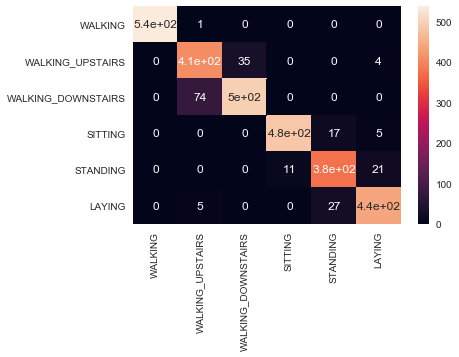

In [160]:
yy = list(map(str, pred))
y_test1 = np.array(y_test.T).ravel()
yy1 = list(map(str,y_test1))
pred1 = np.array(pd.Series(yy).map(dickey))
y_test1 = np.array(pd.Series(yy1).map(dickey))

array = confusion_matrix(pred1,y_test1)
df_cm = pd.DataFrame(array, range(6),range(6))
#sn.set(font_scale=1)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12},yticklabels=("WALKING", "WALKING_UPSTAIRS","WALKING_DOWNSTAIRS","SITTING","STANDING","LAYING"), xticklabels=("WALKING", "WALKING_UPSTAIRS","WALKING_DOWNSTAIRS","SITTING","STANDING","LAYING"))# font size
plt.show()

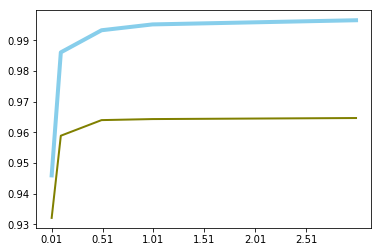

In [85]:
# multiple line plot
plt.plot( cli,trainacc , marker='', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( cli,testacc ,marker='', color='olive', linewidth=2)
plt.xticks(np.arange(min(cli), max(cli), 0.5))
plt.show()

## Support Vector Machine

In [131]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, y_train) 
predsvm = clf.predict(X_test)
accuracy_score(y_true = y_test, y_pred = predsvm)
predsvm = clf.predict(X_train)
accuracy_score(y_true = y_train, y_pred = predsvm)

## Neural Network 


In [68]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(alpha=5,hidden_layer_sizes=(300, 6), random_state=1)
clf.fit(X_train,y)

MLPClassifier(activation='relu', alpha=5, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(300, 6), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

Training Accuracy in Neural Network: 0.9737486398258978
Testing Accuracy in Neural Network: 0.9541907024092298


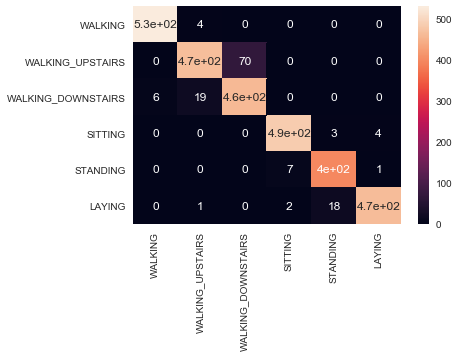

In [162]:
pred = clf.predict(X_test)
predt = clf.predict(X_train)
TeAccuracy = accuracy_score(y_true = y_test, y_pred = pred)
TrAccuracy = accuracy_score(y_true = y_train, y_pred = predt)

print("Training Accuracy in Neural Network: {}".format(TrAccuracy))
print("Testing Accuracy in Neural Network: {}".format(TeAccuracy))

yy = list(map(str, pred))
y_test1 = np.array(y_test.T).ravel()
yy1 = list(map(str,y_test1))
pred1 = np.array(pd.Series(yy).map(dickey))
y_test1 = np.array(pd.Series(yy1).map(dickey))

array = confusion_matrix(pred1,y_test1)
df_cm = pd.DataFrame(array, range(6),range(6))
#sn.set(font_scale=1)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12},yticklabels=("WALKING", "WALKING_UPSTAIRS","WALKING_DOWNSTAIRS","SITTING","STANDING","LAYING"), xticklabels=("WALKING", "WALKING_UPSTAIRS","WALKING_DOWNSTAIRS","SITTING","STANDING","LAYING"))# font size
plt.show()